## Automotive Diagnostics

##### Import libraries

In [52]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Data Exploration

In [53]:
# file_path = "OBD-II-Dataset/2017-07-05_Seat_Leon_RT_S_Stau.csv"
file_path = "OBD-II-Dataset/2017-07-11_Seat_Leon_S_RT_Frei.csv"
data1 = pd.read_csv(file_path)
# data1 = pd.read_csv("OBD-II-Dataset/annotated.csv")
data1.head(11)

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,18:34:06.275,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18:34:06.365,54,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18:34:06.457,54,99.0,769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18:34:06.548,54,99.0,769.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,18:34:06.636,54,99.0,769.0,0.0,41.0,NaN,NaN,NaN,NaN,NaN
5,18:34:06.726,54,99.0,769.0,0.0,41.0,11.91,NaN,NaN,NaN,NaN
6,18:34:06.816,54,99.0,769.0,0.0,41.0,11.91,83.1,NaN,NaN,NaN
7,18:34:06.880,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,NaN,NaN
8,18:34:06.967,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,14.1,NaN
9,18:34:07.057,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,14.1,14.5


In [54]:
file_path2 = "OBD-II-Dataset/2017-07-07_Seat_Leon_RT_S_Normal.csv"
data2 = pd.read_csv(file_path2)
data2.head(11)

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,07:23:12.009,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07:23:12.099,32,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07:23:12.189,32,96.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07:23:12.279,32,96.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,07:23:12.369,32,96.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN
5,07:23:12.459,32,96.0,0.0,0.0,23.0,0.91,NaN,NaN,NaN,NaN
6,07:23:12.549,32,96.0,0.0,0.0,23.0,0.91,89.0,NaN,NaN,NaN
7,07:23:12.639,32,96.0,0.0,0.0,23.0,0.91,89.0,22.0,NaN,NaN
8,07:23:12.729,32,96.0,0.0,0.0,23.0,0.91,89.0,22.0,14.1,NaN
9,07:23:12.819,32,96.0,0.0,0.0,23.0,0.91,89.0,22.0,14.1,14.5


In [55]:
# file_path3 = "OBD-II-Dataset/2017-07-05_Seat_Leon_RT_S_Frei.csv"
file_path3 = "OBD-II-Dataset/2017-07-11_Seat_Leon_S_RT_Frei.csv"
data3 = pd.read_csv(file_path3)
data3.head(11)

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,18:34:06.275,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18:34:06.365,54,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18:34:06.457,54,99.0,769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18:34:06.548,54,99.0,769.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,18:34:06.636,54,99.0,769.0,0.0,41.0,NaN,NaN,NaN,NaN,NaN
5,18:34:06.726,54,99.0,769.0,0.0,41.0,11.91,NaN,NaN,NaN,NaN
6,18:34:06.816,54,99.0,769.0,0.0,41.0,11.91,83.1,NaN,NaN,NaN
7,18:34:06.880,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,NaN,NaN
8,18:34:06.967,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,14.1,NaN
9,18:34:07.057,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,14.1,14.5


In [56]:
# data2 = pd.read_csv("OBD-II-Dataset/2017-07-05_Seat_Leon_S_KA_Normal.csv")
# # data1 = pd.read_csv("OBD-II-Dataset/annotated.csv")
# data2.head()

In [57]:
# Show number of columns (features)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28114 entries, 0 to 28113
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time                                       28114 non-null  object 
 1   Engine Coolant Temperature [Â°C]           28114 non-null  int64  
 2   Intake Manifold Absolute Pressure [kPa]    28113 non-null  float64
 3   Engine RPM [RPM]                           28112 non-null  float64
 4   Vehicle Speed Sensor [km/h]                28111 non-null  float64
 5   Intake Air Temperature [Â°C]               28110 non-null  float64
 6   Air Flow Rate from Mass Flow Sensor [g/s]  28109 non-null  float64
 7   Absolute Throttle Position [%]             28108 non-null  float64
 8   Ambient Air Temperature [Â°C]              28107 non-null  float64
 9   Accelerator Pedal Position D [%]           28106 non-null  float64
 10  Accelerator Pedal Posi

In [58]:
data1.isnull().sum()

Time                                         0
Engine Coolant Temperature [Â°C]             0
Intake Manifold Absolute Pressure [kPa]      1
Engine RPM [RPM]                             2
Vehicle Speed Sensor [km/h]                  3
Intake Air Temperature [Â°C]                 4
Air Flow Rate from Mass Flow Sensor [g/s]    5
Absolute Throttle Position [%]               6
Ambient Air Temperature [Â°C]                7
Accelerator Pedal Position D [%]             8
Accelerator Pedal Position E [%]             9
dtype: int64

In [59]:
data1.isnull().sum().sum()

45

In [60]:
# Set time index
data1["Time"] = pd.to_datetime(data1["Time"])
data1 = data1.set_index("Time")

data2["Time"] = pd.to_datetime(data2["Time"])
data2 = data2.set_index("Time")

data3["Time"] = pd.to_datetime(data3["Time"])
data3 = data3.set_index("Time")


#### Visualise each column in the dataset

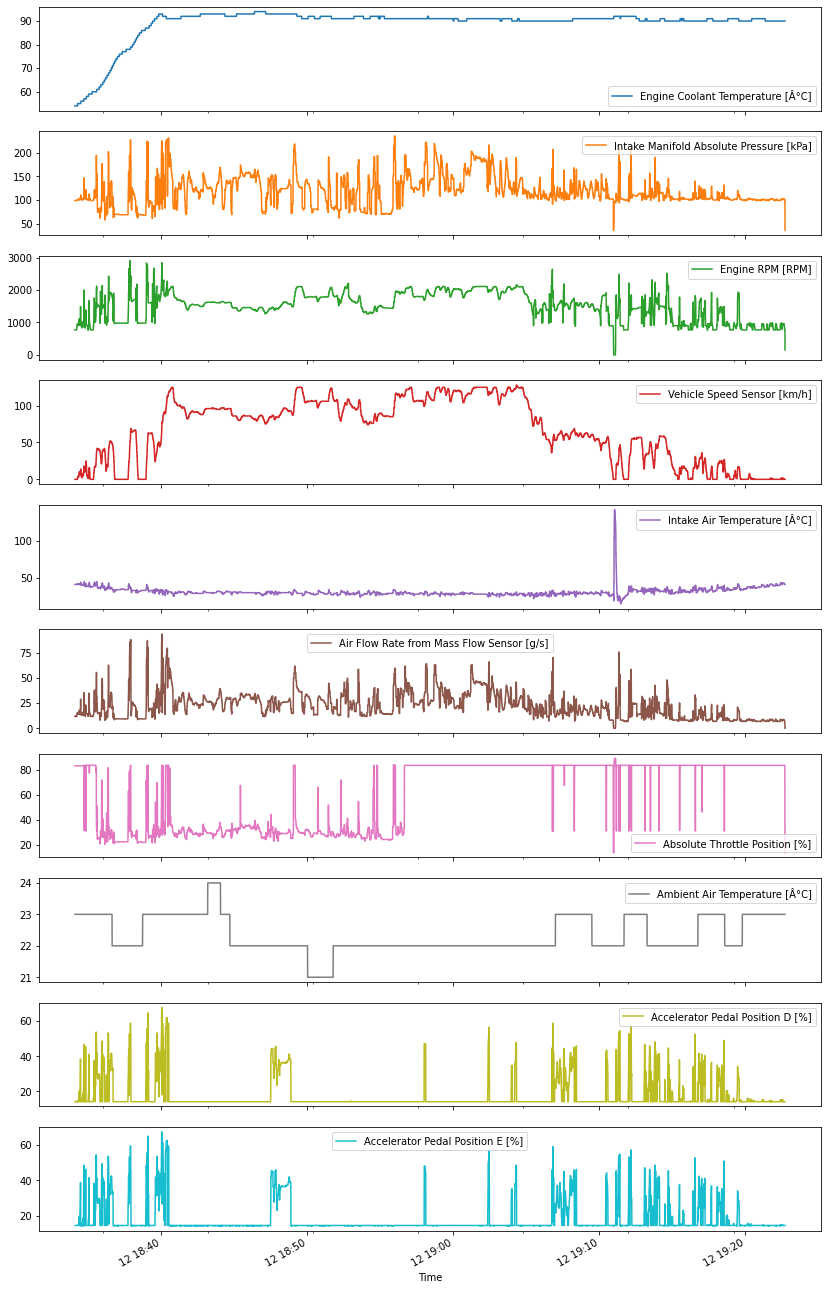

In [61]:
data1.plot(subplots=True, figsize=(14,25))
plt.show()

In [62]:
print(data1.count())

Engine Coolant Temperature [Â°C]             28114
Intake Manifold Absolute Pressure [kPa]      28113
Engine RPM [RPM]                             28112
Vehicle Speed Sensor [km/h]                  28111
Intake Air Temperature [Â°C]                 28110
Air Flow Rate from Mass Flow Sensor [g/s]    28109
Absolute Throttle Position [%]               28108
Ambient Air Temperature [Â°C]                28107
Accelerator Pedal Position D [%]             28106
Accelerator Pedal Position E [%]             28105
dtype: int64


In [63]:
print(f"the number of rows in the data is: ", len(data1))

the number of rows in the data is:  28114


In [64]:
data1.describe()

,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
count,28114.000000,28113.000000,28112.000000,28111.000000,28110.000000,28109.000000,28108.000000,28107.000000,28106.000000,28105.000000
mean,88.420004,117.666845,1444.981431,58.300665,31.864817,21.127258,63.489135,22.433949,18.067053,18.413183
std,8.053808,29.446463,432.232713,42.211624,7.007328,12.586903,26.227905,0.568515,9.234619,9.267481
min,54.000000,36.000000,0.000000,0.000000,15.000000,0.000000,13.700000,21.000000,14.100000,14.100000
25%,90.000000,101.000000,981.000000,15.000000,29.000000,11.270000,31.000000,22.000000,14.100000,14.500000
50%,91.000000,111.000000,1480.000000,59.000000,31.000000,18.880000,83.500000,22.000000,14.100000,14.500000
75%,92.000000,132.000000,1760.000000,95.000000,34.000000,28.080000,83.500000,23.000000,14.100000,14.500000
max,94.000000,235.000000,2910.000000,128.000000,142.000000,93.910000,89.000000,24.000000,67.800000,67.500000


In [65]:
# Drop any rows with missing values
# data1.dropna(inplace=True)

# Removing data points with missing value(s)
data1 = data1.iloc[10:]
data1.head()

data2 = data2.iloc[10:]
data2.head()

data3 = data3.iloc[10:]
data3.head()

,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
Time,,,,,,,,,,
2024-02-12 18:34:07.118,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,14.1,14.5
2024-02-12 18:34:07.178,54,99.0,769.0,0.0,41.0,11.91,83.1,23.0,14.1,14.5
2024-02-12 18:34:07.266,54,99.0,772.0,0.0,41.0,11.91,83.1,23.0,14.1,14.5
2024-02-12 18:34:07.328,54,99.0,772.0,0.0,41.0,11.91,83.1,23.0,14.1,14.5
2024-02-12 18:34:07.417,54,99.0,772.0,0.0,41.0,11.91,83.1,23.0,14.1,14.5


In [66]:
## Renaming the column names
data1.columns = ['Engine_Coolant_Temperature', 'Intake_Manifold_Abs_Pressure', 'Engine_RPM', 'Vehicle_Speed', 'Intake_Air_Temperature', 'AirFlow_Rate', 'Throttle_Position', 'Air_Temperature', 'Acc_Pedal_Pos_D', 'Acc_Pedal_Pos_E']
data2.columns = ['Engine_Coolant_Temperature', 'Intake_Manifold_Abs_Pressure', 'Engine_RPM', 'Vehicle_Speed', 'Intake_Air_Temperature', 'AirFlow_Rate', 'Throttle_Position', 'Air_Temperature', 'Acc_Pedal_Pos_D', 'Acc_Pedal_Pos_E']
data3.columns = ['Engine_Coolant_Temperature', 'Intake_Manifold_Abs_Pressure', 'Engine_RPM', 'Vehicle_Speed', 'Intake_Air_Temperature', 'AirFlow_Rate', 'Throttle_Position', 'Air_Temperature', 'Acc_Pedal_Pos_D', 'Acc_Pedal_Pos_E']


<AxesSubplot:>

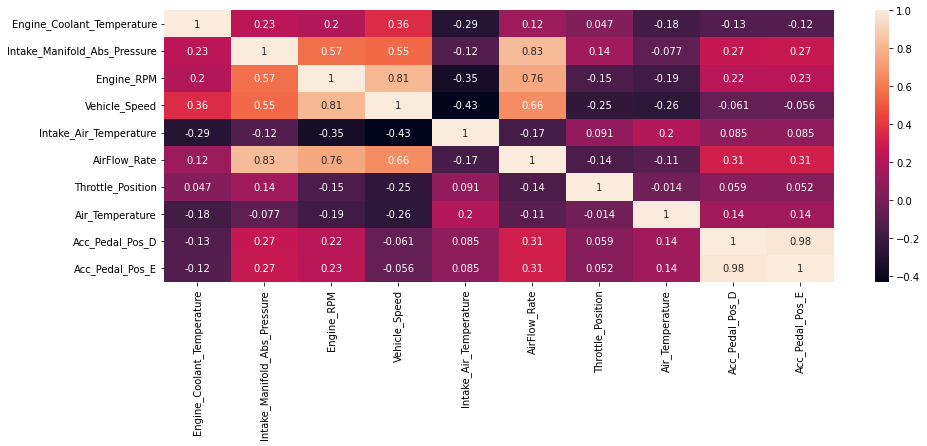

In [67]:
plt.figure(figsize=(15,5))
sns.heatmap(data1.iloc[:,0:].corr(), annot=True)

#### Assessing Engine Load

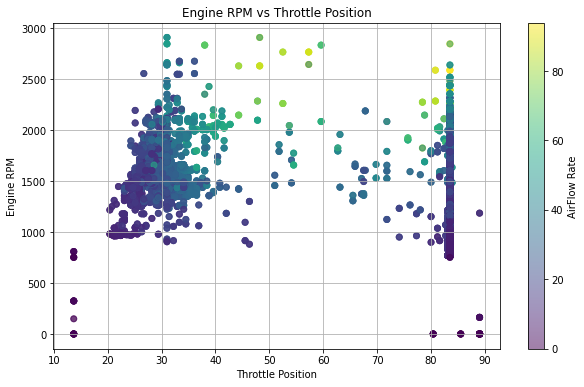

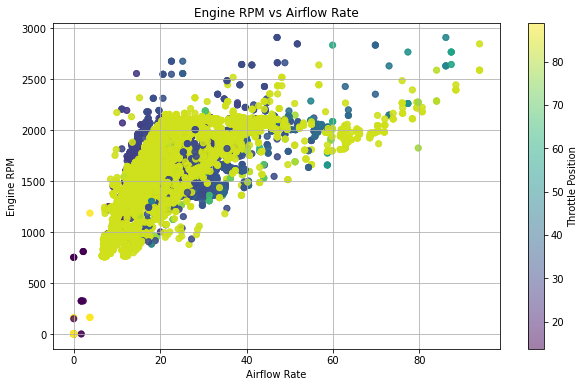

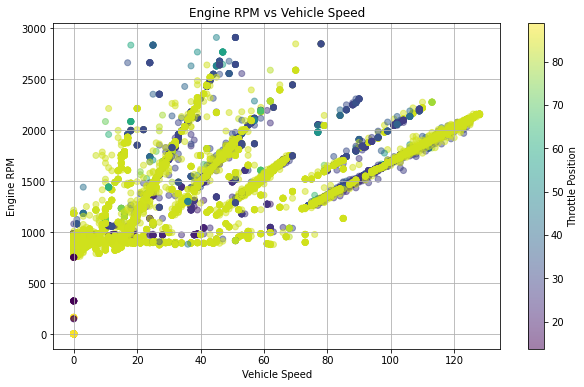

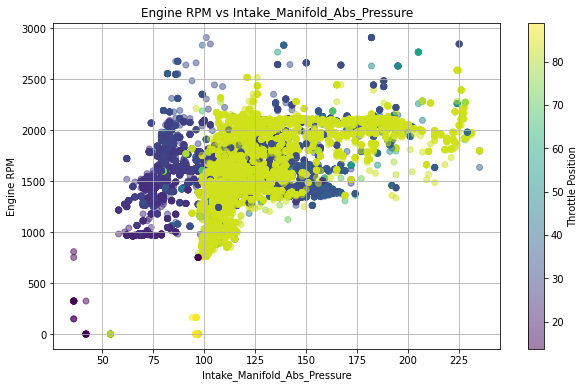

In [69]:
# select relevant columns for analysis (engine RPM, throttle position, airflow rate)
selected_columns = ['Engine_RPM', 'Throttle_Position', 'AirFlow_Rate', 'Vehicle_Speed', 'Intake_Manifold_Abs_Pressure']
engine_data = data1[selected_columns]

# Plot engine RPM vs throttle position
plt.figure(figsize=(10, 6))
plt.scatter(engine_data['Throttle_Position'], engine_data['Engine_RPM'], c=engine_data['AirFlow_Rate'], cmap='viridis', alpha=0.5)
plt.colorbar(label='AirFlow Rate')
plt.xlabel('Throttle Position')
plt.ylabel('Engine RPM')
plt.title('Engine RPM vs Throttle Position')
plt.grid(True)
plt.show()


# Plot engine RPM vs airflow rate
plt.figure(figsize=(10, 6))
plt.scatter(engine_data['AirFlow_Rate'], engine_data['Engine_RPM'], c=engine_data['Throttle_Position'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Throttle Position')
plt.xlabel('Airflow Rate')
plt.ylabel('Engine RPM')
plt.title('Engine RPM vs Airflow Rate')
plt.grid(True)
plt.show()


# Plot engine RPM vs vehicle speed
plt.figure(figsize=(10, 6))
plt.scatter(engine_data['Vehicle_Speed'], engine_data['Engine_RPM'], c=engine_data['Throttle_Position'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Throttle Position')
plt.xlabel('Vehicle Speed')
plt.ylabel('Engine RPM')
plt.title('Engine RPM vs Vehicle Speed')
plt.grid(True)
plt.show()


# Plot engine RPM vs vehicle speed
plt.figure(figsize=(10, 6))
plt.scatter(engine_data['Intake_Manifold_Abs_Pressure'], engine_data['Engine_RPM'], c=engine_data['Throttle_Position'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Throttle Position')
plt.xlabel('Intake_Manifold_Abs_Pressure')
plt.ylabel('Engine RPM')
plt.title('Engine RPM vs Intake_Manifold_Abs_Pressure')
plt.grid(True)
plt.show()


In [70]:
# Check features that affect the speed

### Fault detection

In [71]:
# Define thresholds or ranges for each feature to detect anomalies
thresholds = {
    'Engine_Coolant_Temperature': (80, 100),  # Example: normal range is 80-100°C
    'Intake_Manifold_Abs_Pressure': (80, 120),  # Example: normal range is 80-120 kPa
    'Engine_RPM': (1000, 6000),  # Example: normal range is 1000-6000 RPM
    'Intake_Air_Temperature': (20, 40),  # Example: normal range is 20-40°C
    'AirFlow_Rate': (200, 500),  # Example: normal range is 200-500 g/s
    'Throttle_Position': (0, 100),  # Example: normal range is 0-100%
    'Air_Temperature': (-10, 40),  # Example: normal range is -10-40°C
    'Acc_Pedal_Pos_D': (0, 100),  # Example: normal range is 0-100%
    'Acc_Pedal_Pos_E': (0, 100)  # Example: normal range is 0-100%
    
}

# Perform diagnosis for each feature
diagnosis_results = {}
for feature, (min_val, max_val) in thresholds.items():
    # Check for values outside the normal range
    anomalies = data1[(data1[feature] < min_val) | (data1[feature] > max_val)]
    if not anomalies.empty:
        diagnosis_results[feature] = anomalies

# Print diagnosis results
for feature, anomalies in diagnosis_results.items():
    print(f"Anomalies detected for {feature}:")
    print(anomalies)
    print()

Anomalies detected for Engine_Coolant_Temperature:
                         Engine_Coolant_Temperature  \
Time                                                  
2024-02-12 18:34:07.118                          54   
2024-02-12 18:34:07.178                          54   
2024-02-12 18:34:07.266                          54   
2024-02-12 18:34:07.328                          54   
2024-02-12 18:34:07.417                          54   
...                                             ...   
2024-02-12 18:38:02.348                          79   
2024-02-12 18:38:02.437                          79   
2024-02-12 18:38:02.527                          79   
2024-02-12 18:38:02.616                          79   
2024-02-12 18:38:02.707                          79   

                         Intake_Manifold_Abs_Pressure  Engine_RPM  \
Time                                                                
2024-02-12 18:34:07.118                          99.0       769.0   
2024-02-12 18:34:07.178   

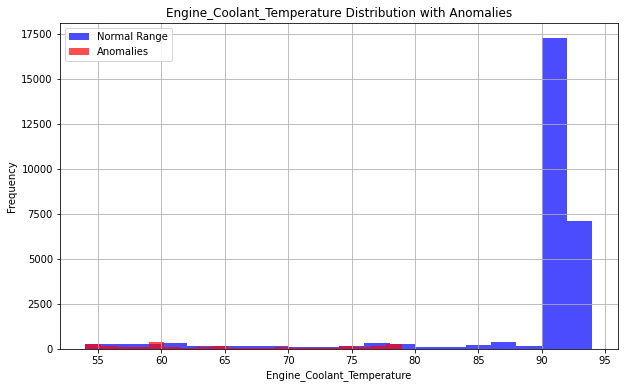

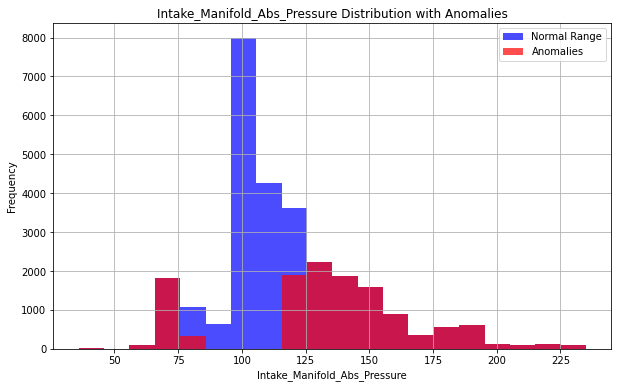

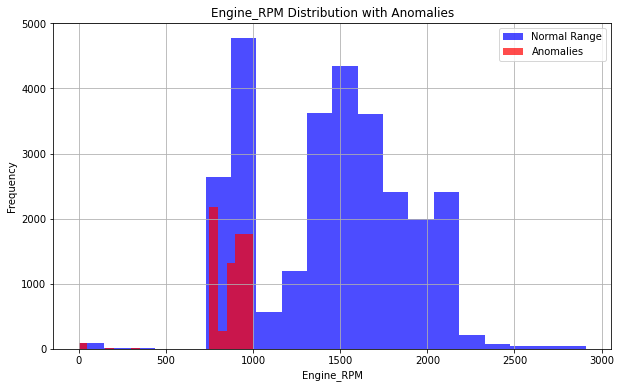

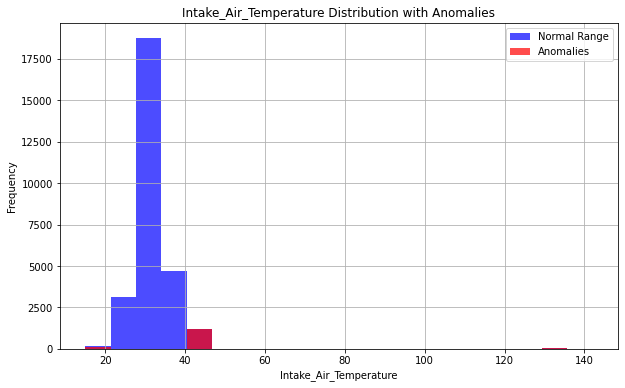

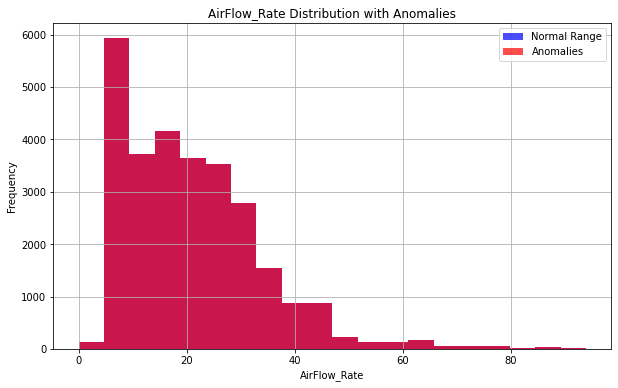

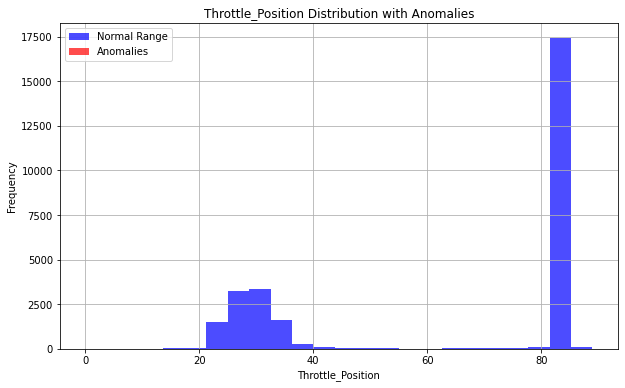

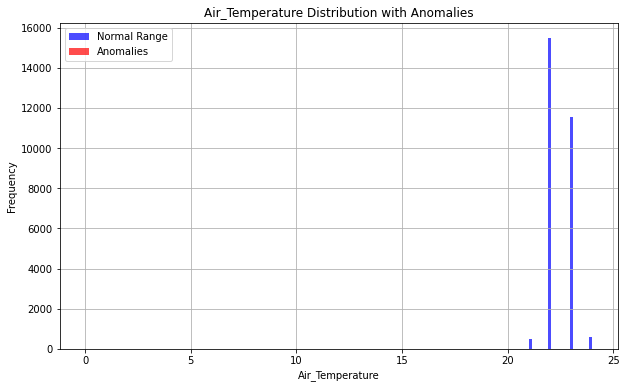

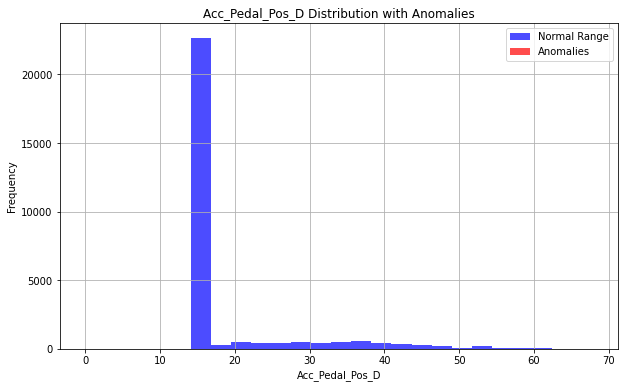

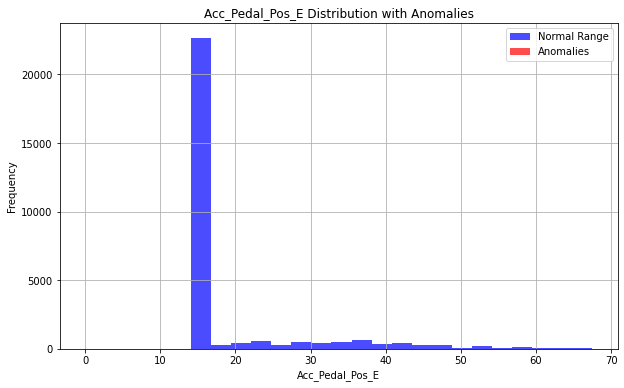

In [72]:

# Define thresholds or ranges for each feature to detect anomalies
thresholds = {
    'Engine_Coolant_Temperature': (80, 100),  # Example: normal range is 80-100°C
    'Intake_Manifold_Abs_Pressure': (80, 120),  # Example: normal range is 80-120 kPa
    'Engine_RPM': (1000, 6000),  # Example: normal range is 1000-6000 RPM
    'Intake_Air_Temperature': (20, 40),  # Example: normal range is 20-40°C
    'AirFlow_Rate': (200, 500),  # Example: normal range is 200-500 g/s
    'Throttle_Position': (0, 100),  # Example: normal range is 0-100%
    'Air_Temperature': (-10, 40),  # Example: normal range is -10-40°C
    'Acc_Pedal_Pos_D': (0, 100),  # Example: normal range is 0-100%
    'Acc_Pedal_Pos_E': (0, 100)  # Example: normal range is 0-100%
}

# Visualize anomalies for each feature
for feature, (min_val, max_val) in thresholds.items():
    # Check for values outside the normal range
    anomalies = data1[(data1[feature] < min_val) | (data1[feature] > max_val)]
   
    # Plot feature distribution with anomalies highlighted
    plt.figure(figsize=(10, 6))
    plt.hist(data1[feature], bins=20, color='blue', alpha=0.7, label='Normal Range')
    plt.hist(anomalies[feature], bins=20, color='red', alpha=0.7, label='Anomalies')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution with Anomalies')
    plt.legend()
    plt.grid(True)
    plt.show()

### Predictive maintenance
Use the data to build predictive models that can anticipate maintenance needs based on changes in parameters like coolant temperature or airflow rate

### Driver Behaviour Analysis
Sudden changes or erratic behaviour might indicate aggresive driving styles, which can increase wear and tear on the engine and other components

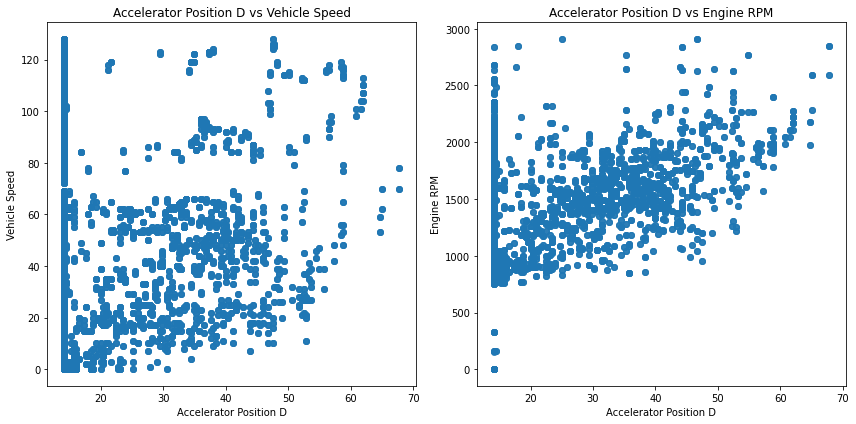

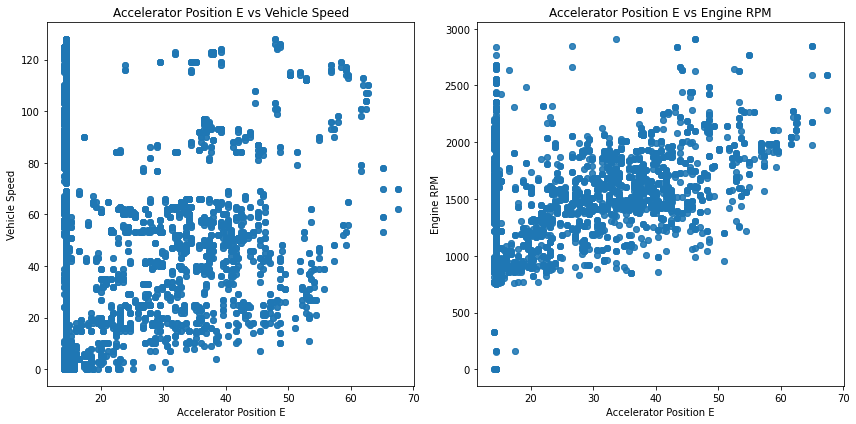

In [73]:
# Select relevant columns
relevant_cols = ['Vehicle_Speed', 'Engine_RPM', 'Acc_Pedal_Pos_D', 'Acc_Pedal_Pos_E']
df = data1[relevant_cols]
df2 = data2[relevant_cols]
df3 = data3[relevant_cols]



# Plotting accelerator pedal position D against vehicle speed and engine rpm
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Acc_Pedal_Pos_D'], df['Vehicle_Speed'], alpha=0.5)
plt.title('Accelerator Position D vs Vehicle Speed')
plt.xlabel('Accelerator Position D')
plt.ylabel('Vehicle Speed')

plt.subplot(1, 2, 2)
plt.scatter(df['Acc_Pedal_Pos_D'], df['Engine_RPM'], alpha=0.5)
plt.title('Accelerator Position D vs Engine RPM')
plt.xlabel('Accelerator Position D')
plt.ylabel('Engine RPM')

plt.tight_layout()
plt.show()

# Plotting accelerator pedal position E against vehicle speed and engine rpm
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Acc_Pedal_Pos_E'], df['Vehicle_Speed'], alpha=0.5)
plt.title('Accelerator Position E vs Vehicle Speed')
plt.xlabel('Accelerator Position E')
plt.ylabel('Vehicle Speed')

plt.subplot(1, 2, 2)
plt.scatter(df['Acc_Pedal_Pos_E'], df['Engine_RPM'], alpha=0.5)
plt.title('Accelerator Position E vs Engine RPM')
plt.xlabel('Accelerator Position E')
plt.ylabel('Engine RPM')


plt.tight_layout()
plt.show()


Text(0, 0.5, 'Engine RPM')

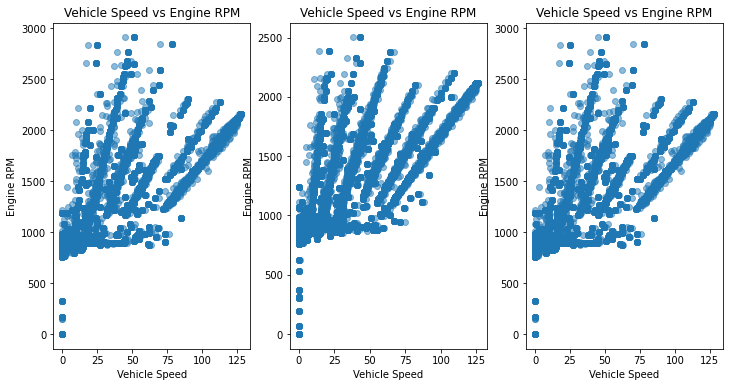

In [74]:
# Plotting vehicle speed against RPM
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df['Vehicle_Speed'], df['Engine_RPM'], alpha=0.5)
plt.title('Vehicle Speed vs Engine RPM')
plt.xlabel('Vehicle Speed')
plt.ylabel('Engine RPM')

plt.subplot(1, 3, 2)
plt.scatter(df2['Vehicle_Speed'], df2['Engine_RPM'], alpha=0.5)
plt.title('Vehicle Speed vs Engine RPM')
plt.xlabel('Vehicle Speed')
plt.ylabel('Engine RPM')

plt.subplot(1, 3, 3)
plt.scatter(df3['Vehicle_Speed'], df3['Engine_RPM'], alpha=0.5)
plt.title('Vehicle Speed vs Engine RPM')
plt.xlabel('Vehicle Speed')
plt.ylabel('Engine RPM')



### One-way ANOVA 
##### To compare speeds among 3 conditions (Normal, Free, and Busy)